In [13]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=25)
mpl.rc('xtick', labelsize=25)
mpl.rc('ytick', labelsize=25)
mpl.rcParams['font.size']=25

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "finger_Fx"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images","finger_1", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
os.makedirs(IMAGES_PATH, exist_ok=True)
import pandas as pd
import os

FINGER_PATH = os.path.join("datasets", "finger_1")

def load_finger_data(finger_path =FINGER_PATH, index = 1):
    csv_path = os.path.join(finger_path, "%d.csv"%index)
    return pd.read_csv(csv_path)

def merge_data(num = 10):
    data = load_finger_data()
    for i in range(1,num): 
        data = data.append(load_finger_data(index = i+1), ignore_index=True)
    return data

data = merge_data(num = 9)
data.describe()

,p_index,m_index,a1,a2,a3,a4,a5,Fy,Fx,Fz,Ty,Tx,Tz
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,5.500000,5.000000,120.756566,434.501010,552.975758,578.120202,88.709091,-0.054279,2.275377,0.608745,-0.188212,0.017042,-0.002545
std,2.873733,3.163876,45.900476,189.204768,242.975774,241.900523,23.014046,0.243584,1.677880,0.517343,0.141410,0.026678,0.021023
min,1.000000,0.000000,20.000000,30.000000,29.000000,39.000000,18.000000,-1.172750,-0.138860,-0.552070,-0.502722,-0.051757,-0.054005
25%,3.000000,2.000000,101.750000,294.250000,392.000000,422.000000,89.250000,-0.148635,0.730348,0.236260,-0.305521,0.001110,-0.015267
50%,5.500000,5.000000,140.000000,548.500000,680.000000,714.000000,98.000000,-0.045180,2.164850,0.537550,-0.174168,0.010311,-0.001276
75%,8.000000,8.000000,151.000000,578.750000,745.000000,765.000000,102.000000,0.023747,3.701890,0.900822,-0.057667,0.025855,0.009275
max,10.000000,10.000000,177.000000,611.000000,774.000000,793.000000,113.000000,0.866470,5.852800,2.427140,0.011895,0.139107,0.048865


Saving figure attribute_histogram_plots


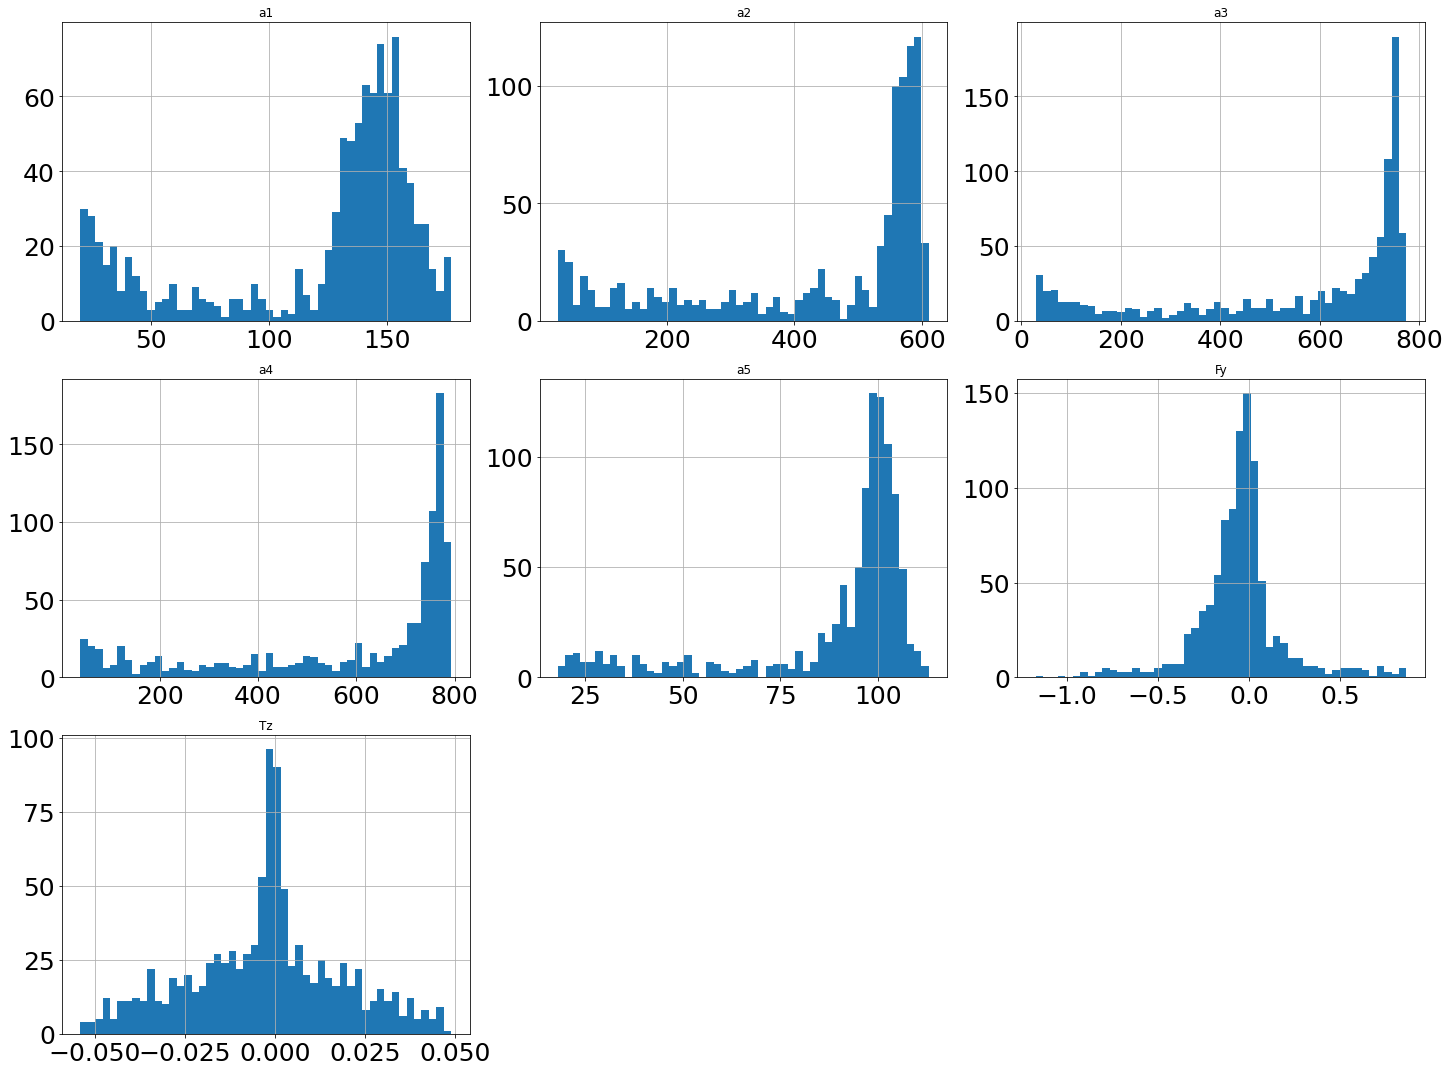

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
data_left = data.drop(['p_index','m_index','Fx','Fz','Tx','Ty'], axis=1)
data_left.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

<AxesSubplot:>

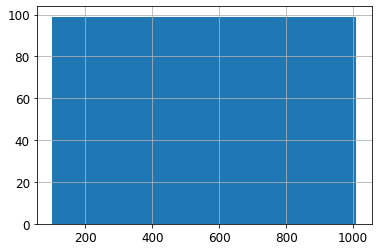

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

data["index"] = data['p_index']*100+data['m_index']
data['index'].hist()

In [5]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["index"]):
    data_train = data.loc[train_index]
    data_test = data.loc[test_index]


<AxesSubplot:>

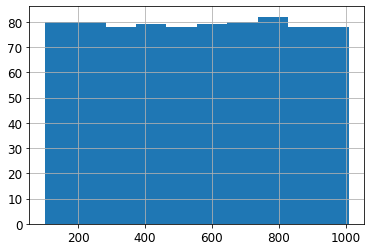

In [6]:
data_train["index"].hist()


<AxesSubplot:>

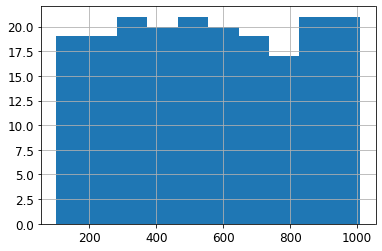

In [7]:
data_test["index"].hist()


In [8]:
for set_ in (data_train, data_test):
    set_.drop("index", axis=1, inplace=True)

In [9]:
finger = data_train.copy()

Saving figure bad_visualization_plot


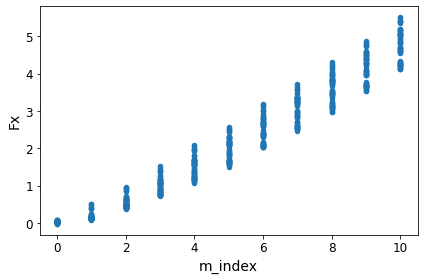

In [10]:
finger.plot(kind="scatter", x="m_index", y="Fx")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot_m_index


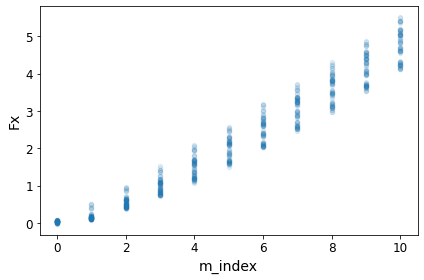

In [11]:
finger.plot(kind="scatter", x="m_index", y="Fx",alpha=0.1)
save_fig("better_visualization_plot_m_index")

Saving figure better_visualization_plot_p_index


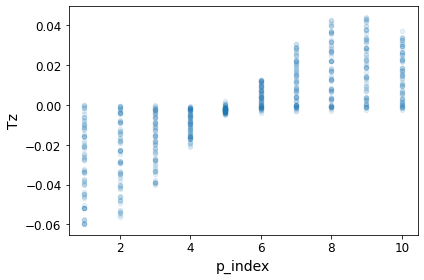

In [12]:
finger.plot(kind="scatter", x="p_index", y="Tz",alpha=0.1)
save_fig("better_visualization_plot_p_index")

Saving figure better_visualization_plot_a1


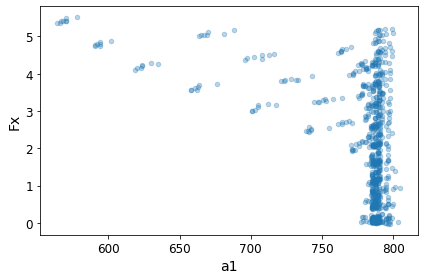

In [13]:
finger.plot(kind="scatter", x="a1", y="Fx",alpha=0.3)
save_fig("better_visualization_plot_a1")

Saving figure better_visualization_plot_a2


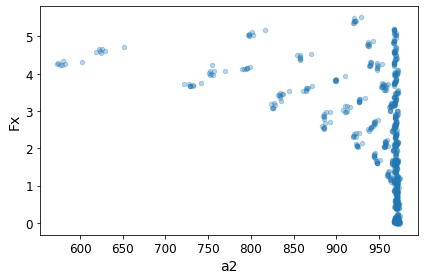

In [14]:
finger.plot(kind="scatter", x="a2", y="Fx",alpha=0.3)
save_fig("better_visualization_plot_a2")

In [15]:
corr_matrix = finger.corr()

In [16]:
corr_matrix["Fx"].sort_values(ascending=False)

Fx         1.000000
m_index    0.978203
Fz         0.038320
p_index   -0.007502
Tz        -0.012813
a3        -0.390181
a1        -0.410354
a2        -0.437122
Tx        -0.456035
a5        -0.456641
Fy        -0.494530
a4        -0.550955
Ty        -0.999465
Name: Fx, dtype: float64

Saving figure scatter_matrix_plot


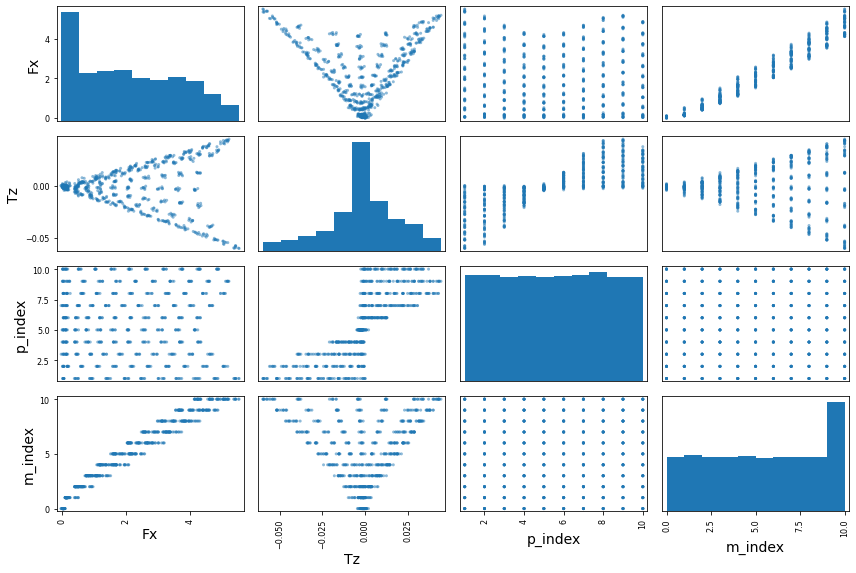

In [17]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["Fx", "Tz", "p_index",
              "m_index"]
scatter_matrix(finger[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

# Prepare the data 

In [18]:
finger = data_train.drop(['p_index','m_index','Fx','Fy','Fz','Tx','Ty','Tz'], axis=1) # drop labels for training set
finger_label = data_train["Fx"].copy()
finger

,a1,a2,a3,a4,a5
280,789.0,972.0,793.0,46.0,769.0
724,789.0,952.0,330.0,32.0,746.0
826,795.0,971.0,809.0,199.0,774.0
650,786.0,972.0,793.0,210.0,761.0
442,793.0,970.0,796.0,213.0,768.0
...,...,...,...,...,...
857,800.0,970.0,795.0,34.0,399.0
136,785.0,960.0,810.0,190.0,773.0
111,793.0,972.0,797.0,215.0,768.0
102,788.0,971.0,797.0,212.0,658.0


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

full_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

finger_pre = full_pipeline.fit_transform(finger)
finger_pre

array([[ 0.31151455,  0.42137596,  0.34729675, -1.37277741,  0.468094  ],
       [ 0.31151455,  0.11170744, -2.60518455, -1.57538844,  0.32692882],
       [ 0.47146237,  0.40589253,  0.44932634,  0.84147166,  0.49878208],
       ...,
       [ 0.41814643,  0.42137596,  0.37280415,  1.07302712,  0.46195638],
       [ 0.28485658,  0.40589253,  0.37280415,  1.02961047, -0.21318143],
       [ 0.28485658,  0.40589253,  0.48121059, -1.22805525,  0.4312683 ]])

# Select and train a model

In [20]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(finger_pre, finger_label)


LinearRegression()

In [21]:
from sklearn.metrics import mean_squared_error

finger_predictions = lin_reg.predict(finger_pre)
lin_mse = mean_squared_error(finger_label, finger_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.6095363888825475

In [22]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(finger_pre, finger_label)

DecisionTreeRegressor(random_state=42)

In [23]:
finger_predictions = tree_reg.predict(finger_pre)
tree_mse = mean_squared_error(finger_label, finger_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0029855854599593378

# Fine-ture

In [24]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, finger_pre, finger_label,
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)

In [25]:

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.22763748 0.23007481 0.30546422 0.24653342 0.24452595]
Mean: 0.25084717559616776
Standard deviation: 0.028325849426287127


In [26]:
lin_scores = cross_val_score(lin_reg, finger_pre, finger_label,
                             scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.63360268 0.56972201 0.59833557 0.62508127 0.64203994]
Mean: 0.6137562949559202
Standard deviation: 0.026453415586908655


In [27]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(finger_pre, finger_label)

RandomForestRegressor(random_state=42)

In [28]:
finger_predictions = forest_reg.predict(finger_pre)
forest_mse = mean_squared_error(finger_label, finger_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.06265661583213829

In [29]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, finger_pre, finger_label,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.1424061  0.1592618  0.21149517 0.16559658 0.164077  ]
Mean: 0.16856732927499907
Standard deviation: 0.022990392455901648


In [30]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="rbf")
svm_reg.fit(finger_pre, finger_label)
finger_predictions = svm_reg.predict(finger_pre)
svm_mse = mean_squared_error(finger_label, finger_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

0.30011678086861737

In [31]:
svm_scores = cross_val_score(svm_reg, finger_pre, finger_label,
                                scoring="neg_mean_squared_error", cv=5)
svm_rmse_scores = np.sqrt(-svm_scores)
display_scores(svm_rmse_scores)

Scores: [0.32545366 0.27749179 0.32398111 0.29584423 0.33494463]
Mean: 0.31154308384993684
Standard deviation: 0.021455934138102303


In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'bootstrap': [True],'n_estimators': [ 3,10,50,100,200,500,1000], 'max_features': [2, 3, 4, 5]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [ 3,10,50,100,200,500,1000], 'max_features': [2, 3, 4, 5]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(finger_pre, finger_label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'bootstrap': [True], 'max_features': [2, 3, 4, 5],
                          'n_estimators': [3, 10, 50, 100, 200, 500, 1000]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4, 5],
                          'n_estimators': [3, 10, 50, 100, 200, 500, 1000]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [33]:
grid_search.best_params_


{'bootstrap': False, 'max_features': 3, 'n_estimators': 1000}

In [34]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=3, n_estimators=1000,
                      random_state=42)

In [35]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.29825067055345406 {'bootstrap': True, 'max_features': 2, 'n_estimators': 3}
0.22447091273454411 {'bootstrap': True, 'max_features': 2, 'n_estimators': 10}
0.19509808702247455 {'bootstrap': True, 'max_features': 2, 'n_estimators': 50}
0.18782429690649827 {'bootstrap': True, 'max_features': 2, 'n_estimators': 100}
0.1848168643951768 {'bootstrap': True, 'max_features': 2, 'n_estimators': 200}
0.1819996975988568 {'bootstrap': True, 'max_features': 2, 'n_estimators': 500}
0.1820142520258067 {'bootstrap': True, 'max_features': 2, 'n_estimators': 1000}
0.2623767375948094 {'bootstrap': True, 'max_features': 3, 'n_estimators': 3}
0.20156446855465596 {'bootstrap': True, 'max_features': 3, 'n_estimators': 10}
0.17898141869444648 {'bootstrap': True, 'max_features': 3, 'n_estimators': 50}
0.17654509601043042 {'bootstrap': True, 'max_features': 3, 'n_estimators': 100}
0.17314744002295077 {'bootstrap': True, 'max_features': 3, 'n_estimators': 200}
0.16944759901845985 {'bootstrap': True, 'max_featur

In [36]:
final_model_forest = grid_search.best_estimator_

final_forest_scores = cross_val_score(final_model_forest, finger_pre, finger_label,
                                scoring="neg_mean_squared_error", cv=5)
final_forest_rmse_scores = np.sqrt(-final_forest_scores)
display_scores(final_forest_rmse_scores)

Scores: [0.11970504 0.15366597 0.21228055 0.14764319 0.16068283]
Mean: 0.15879551550104298
Standard deviation: 0.030142867984764066


In [37]:

X_test = data_test.drop(['p_index','m_index','Fx','Fy','Fz','Tx','Ty','Tz'], axis=1)
y_test = data_test["Fx"].copy()

X_test_pre = full_pipeline.transform(X_test)
final_forest_predictions = final_model_forest.predict(X_test_pre)

final_forest_mse = mean_squared_error(y_test, final_forest_predictions)
final_forest_rmse = np.sqrt(final_forest_mse)

In [38]:
final_forest_rmse

0.11567935458134236

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000.]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(finger_pre, finger_label)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ C=10.0, kernel=linear, total=   0.2s
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ............................ C=10.0, kernel=linear, total=   0.2s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   0.2s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   0.2s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   0.2s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   0.5s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   0.5s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   0.4s
[CV] C=30.0, kernel=linear ...........................................
[CV] .

[CV] ..................... C=1.0, gamma=3.0, kernel=rbf, total=   0.0s
[CV] C=1.0, gamma=3.0, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=3.0, kernel=rbf, total=   0.0s
[CV] C=3.0, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=3.0, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=3.0, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=3.0, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=3.0, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=3.0, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=3.0, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=3.0, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=3.0, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=3.0, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=3.0, gamma=0.03, kernel=rbf ...................................
[CV] .

[CV] .................... C=10.0, gamma=3.0, kernel=rbf, total=   0.0s
[CV] C=10.0, gamma=3.0, kernel=rbf ...................................
[CV] .................... C=10.0, gamma=3.0, kernel=rbf, total=   0.0s
[CV] C=10.0, gamma=3.0, kernel=rbf ...................................
[CV] .................... C=10.0, gamma=3.0, kernel=rbf, total=   0.0s
[CV] C=30.0, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=30.0, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=30.0, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=30.0, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=30.0, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=30.0, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=30.0, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=30.0, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=30.0, gamma=0.01, kernel=rbf ..................................
[CV] .

[CV] ................... C=100.0, gamma=3.0, kernel=rbf, total=   0.1s
[CV] C=100.0, gamma=3.0, kernel=rbf ..................................
[CV] ................... C=100.0, gamma=3.0, kernel=rbf, total=   0.1s
[CV] C=100.0, gamma=3.0, kernel=rbf ..................................
[CV] ................... C=100.0, gamma=3.0, kernel=rbf, total=   0.1s
[CV] C=100.0, gamma=3.0, kernel=rbf ..................................
[CV] ................... C=100.0, gamma=3.0, kernel=rbf, total=   0.1s
[CV] C=300.0, gamma=0.01, kernel=rbf .................................
[CV] .................. C=300.0, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=300.0, gamma=0.01, kernel=rbf .................................
[CV] .................. C=300.0, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=300.0, gamma=0.01, kernel=rbf .................................
[CV] .................. C=300.0, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=300.0, gamma=0.01, kernel=rbf .................................
[CV] .

[CV] .................. C=1000.0, gamma=1.0, kernel=rbf, total=   0.4s
[CV] C=1000.0, gamma=3.0, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=3.0, kernel=rbf, total=   0.4s
[CV] C=1000.0, gamma=3.0, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=3.0, kernel=rbf, total=   0.5s
[CV] C=1000.0, gamma=3.0, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=3.0, kernel=rbf, total=   0.4s
[CV] C=1000.0, gamma=3.0, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=3.0, kernel=rbf, total=   0.5s
[CV] C=1000.0, gamma=3.0, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=3.0, kernel=rbf, total=   0.6s


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 24.2min finished


GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [40]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

0.179714140380938

In [41]:
final_model_svm = grid_search.best_estimator_

final_svm_scores = cross_val_score(final_model_svm, finger_pre, finger_label,
                                scoring="neg_mean_squared_error", cv=5)
final_svm_rmse_scores = np.sqrt(-final_svm_scores)
display_scores(final_svm_rmse_scores)

Scores: [0.17879224 0.15356568 0.18552013 0.16767295 0.20833828]
Mean: 0.1787778573069952
Standard deviation: 0.018320752975223148


In [42]:
final_model_svm = grid_search.best_estimator_


X_test = data_test.drop(['p_index','m_index','Fx','Fy','Fz','Tx','Ty','Tz'], axis=1)
y_test = data_test["Fx"].copy()

X_test_pre = full_pipeline.transform(X_test)
final_svm_predictions = final_model_svm.predict(X_test_pre)

final_svm_mse = mean_squared_error(y_test, final_svm_predictions)
final_svm_rmse = np.sqrt(final_svm_mse)

In [43]:
final_svm_rmse

0.16987501613058378

# Result

In [44]:
rmse = [lin_rmse,tree_rmse,forest_rmse,svm_rmse,0,0]

rmse_scores = [lin_rmse_scores.mean(),tree_rmse_scores.mean(),forest_rmse_scores.mean(),svm_rmse_scores.mean(),final_forest_rmse_scores.mean(),final_svm_rmse_scores.mean()]
rmse,rmse_scores
rmse_test = [0,0,0,0,final_forest_rmse,final_svm_rmse]

In [45]:
result = pd.DataFrame([rmse,rmse_scores,rmse_test],index = ['rmse','rmse_mean','rmse_test'],
             columns = ['liner','tree','forest','svm','final_forest','final_svm'])
result

,liner,tree,forest,svm,final_forest,final_svm
rmse,0.609536,0.002986,0.062657,0.300117,0.000000,0.000000
rmse_mean,0.613756,0.250847,0.168567,0.311543,0.158796,0.178778
rmse_test,0.000000,0.000000,0.000000,0.000000,0.115679,0.169875


Saving figure result


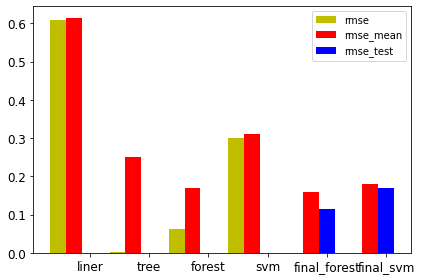

In [46]:
name_list = ['liner','tree','forest','svm','final_forest','final_svm']
num_list_1 = rmse
num_list_2 = rmse_scores
num_list_3 = rmse_test

x =list(range(len(num_list_1)))
total_width, n = 0.8, 3
width = total_width / n
 
plt.bar(x, num_list_1, width=width, label='rmse',fc = 'y')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, num_list_2, width=width, label='rmse_mean',tick_label = name_list,fc = 'r')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, num_list_3, width=width, label='rmse_test',tick_label = name_list,fc = 'b')

plt.legend()

save_fig("result")

plt.show()


# Save

In [48]:
Prepare_forest = Pipeline([
    ('preparation', full_pipeline),
    ('svm_forest', final_model_forest)
])

In [49]:
import joblib
joblib.dump(Prepare_SVR, "model/finger_2/final_model_forest_Fx.pkl") # DIFF
#...
my_model_loaded = joblib.load("model/finger_2/final_model_forest_Fx.pkl") # DIFF

Populating the interactive namespace from numpy and matplotlib


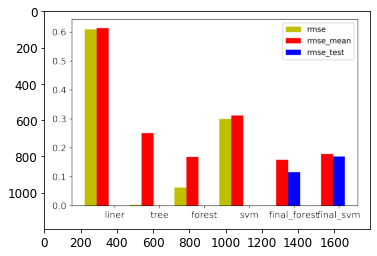

In [51]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('images/finger_2/finger_Fx/result.png')
imgplot = plt.imshow(img)
plt.show()

In [52]:
result.to_csv('images/finger_2/finger_Fx/result.csv',index = False, header = ['liner','tree','forest','svm','final_forest','final_svm'])
